## Basic Neural Network

In [1]:
# Import Dependencies
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set Seed in Torch
torch.manual_seed(1)

### Define NN Architecture

In [3]:
# Neural Network Class
class BasicNN(nn.Module):
    
    # Initializer Function
    def __init__(self, num_features, num_hidden, num_output):
        super(BasicNN, self).__init__()
        # Initialize input to hidden layer
        self.hidden = torch.nn.Linear(num_features, num_hidden)
        # Initilize hidden layer to output
        self.output = torch.nn.Linear(num_hidden, num_output)
        
    # Forward Pass
    def forward(self,x):
        # Apply activation function to hidden layer
        x = nn.functional.relu(self.hidden(x))
        # Linear Output
        x = self.output(x)
        return x

In [4]:
# Initialize the model
model1 = BasicNN(num_features=1, num_hidden=10, num_output=1)
print(model1)

BasicNN(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [5]:
# Other way of defining a model
model2 = nn.Sequential(
         nn.Linear(1,10),
         nn.ReLU(),
         nn.Linear(10,1))
print(model2)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
# Generate some data

# x.shape = (100, 1)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)

# Noisy y data, shape=(100, 1)
y = X.pow(2) + 0.2*torch.rand(X.size())

# Convert "x" and "y" to torch tensor
X, y = Variable(X, requires_grad=False), Variable(y, requires_grad=False)

type(X), type(y)

(torch.Tensor, torch.Tensor)

## Save Model

In [7]:
# Save NN Function
def saveNN():
    
    # Define Model-1
    model1 = nn.Sequential(
             nn.Linear(1,10),
             nn.ReLU(),
             nn.Linear(10,1))
    
    # Define Optimizer
    optimizer = torch.optim.SGD(model1.parameters(), lr=0.05)
    
    # Define Loss Function
    loss_func = nn.MSELoss()
    
    # Train the Model
    epochs = 100
    
    for epoch in range(epochs):
        # Predicted Output
        y_hat = model1(X)
        
        # Loss
        loss = loss_func(y_hat, y)
        
        # Clear the Gradients
        optimizer.zero_grad()
        
        # Back Propagation
        loss.backward()
        
        # Optimize
        optimizer.step()
        
        if epoch%10 == 0:
            print("Epoch: {0}\t Loss: {1}".format(epoch,loss.data[0]))
        
    # Plot the Results
    plt.figure(1, figsize=(20, 5))
    plt.subplot(131)
    plt.title('Model-1')
    plt.scatter(X.data.numpy(), y.data.numpy(), color = "red")
    plt.plot(X.data.numpy(), y_hat.data.numpy(), 'y-', lw=5)
    
    # Save the Trained Model
    # 1. Save entire Neural Network
    torch.save(model1, './saved_model/model_1.pkl')
    print("\nModel Saved at ./saved_model/model_1.pkl...\n")
    
    # 2. Save only the Parameters i.e Weights & Biases
    torch.save(model1.state_dict(), './saved_model/model_1_params.pkl')
    print("Model Parameters Saved at ./saved_model/model_1_params.pkl...\n")

## Load Saved Model

In [8]:
# Function to restore the Saved Model into a New Model
def restoreModel():
    # Restore entire model-1 to a new model, model-2
    model2 = torch.load('./saved_model/model_1.pkl')
    y_pred = model2(X)

    # Plot Saved Model Results
    plt.figure(1, figsize=(20, 5))
    plt.subplot(132)
    plt.title('Model-2')
    plt.scatter(X.data.numpy(), y.data.numpy(), color = "red")
    plt.plot(X.data.numpy(), y_pred.data.numpy(), 'y-', lw=5)

## Restore Model Parameters

In [9]:
# Function to Restore Model Parameters
def restoreModelParams():
    # Restore only the Parameters in saved model-1 to a new model, model-3
    # Create the Model Architecture
    model3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    
    # Copy model-1's Parameters into model-3
    model3.load_state_dict(torch.load('./saved_model/model_1_params.pkl'))
    y_pred = model3(X)
    
    # Plot Results from Loaded Model
    plt.figure(1, figsize=(20, 5))
    plt.subplot(133)
    plt.title('Model-3')
    plt.scatter(X.data.numpy(), y.data.numpy(), color = "red")
    plt.plot(X.data.numpy(), y_pred.data.numpy(), 'y-', lw=5)
    plt.show()

## Plot the Models, model-1, model-2 and model-3 for Verification

Epoch: 0	 Loss: 0.9994783997535706
Epoch: 10	 Loss: 0.10376431792974472
Epoch: 20	 Loss: 0.10072514414787292
Epoch: 30	 Loss: 0.09799028933048248
Epoch: 40	 Loss: 0.09557335078716278
Epoch: 50	 Loss: 0.09344539791345596
Epoch: 60	 Loss: 0.09148307144641876
Epoch: 70	 Loss: 0.08959227055311203
Epoch: 80	 Loss: 0.08768895268440247
Epoch: 90	 Loss: 0.08571644127368927

Model Saved at ./saved_model/model_1.pkl...

Model Parameters Saved at ./saved_model/model_1_params.pkl...



/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


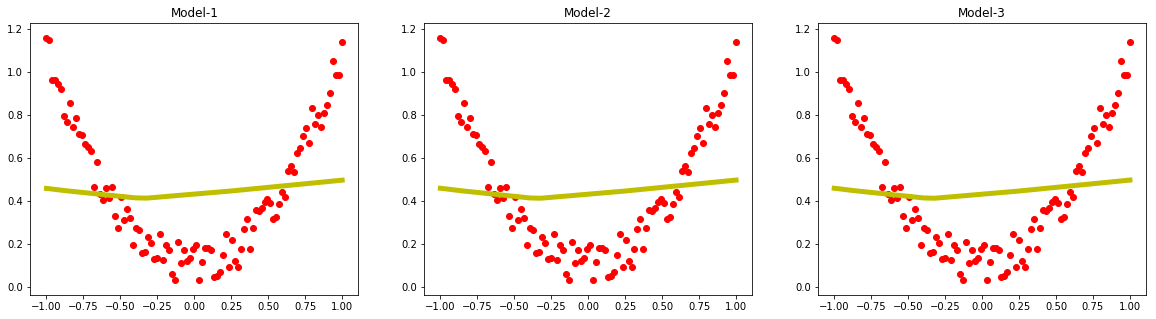

In [10]:
# Save the Model, saved model-1
saveNN()

# Restore the model from Saved Model
restoreModel()

# Model with Restored Parameters
restoreModelParams()

***The above plots prove that we saved the "model-1", restored the model as "model-2" and also restored model-1 as "model-3" with model-1's saved parameters.***